# Equipe 7:
- Gabriel Lenon Barros da Silva (glbs@cesar.school)
- Bruno Venceslau Barbosa (bvb@cesar.school)
- Carolina Queiroz de Sousa (cqs@cesar.school)
- Gustavo Miguel Ferreira da Silva (gmfs@cesar.school)
- Pedro Henrique de Amaral lira (phal@cesar.school)

# Arvores de Decisão - Regressão

## Dicionário dos dados:

Aquisição de dados: Este é os dados de clima para Seattle, WA, em 2016,
usando o instrumento NOAA Climate Data Online.

- year: 2016
- month: número do mês do ano (por exemplo, 7 para julho)
- day: número do dia do ano (por exemplo, 30 para 30 de junho)
- week: dia da semana como uma string de caractere (por exemplo,
"segunda-feira")
- temp_1: temperatura de um dia anterior
- temp_2: temperatura de dois dias anteriores
- average: Média histórica da temperatura máxima
- Previsão do seu amigo (aleatório), valor menor 20 abaixo da média ou 20 acima da média
- actual: Medição de temperatura máxima real

Atividade:
1. Carregamento de dados
2. O valor esperado de saída é **actual**
3. Remover as colunas 'year', 'month', 'day', 'week' pois não vamos considerar dados históricos relacionados a série temporal
4. Análise descritiva dos dados
5. Remoção de campos desnecessários
6. Tratamento de dados nulos e/ou faltantes
7. Separação dos dados, holdout
8. Normalização dos dados
9. Treinamento de modelos

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Obtenha os dados
** Leia o arquivo csv 'temps.csv' em um DataFrame **

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/Bruno-Venceslau/dataset-modelos_preditivos/refs/heads/main/temps.csv')

** Verifique o cabeçalho do DataFrame.**

In [48]:
df.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [50]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Remoção das colunas year,	month, day e week, pois não vamos trabalhar com a série temporal

In [51]:
df.drop(columns=["year", "month", "day", "week"], inplace=True)

In [52]:
df.head()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,45,45,45.6,45,43,50,44,29
1,44,45,45.7,44,41,50,44,61
2,45,44,45.8,41,43,46,47,56
3,44,41,45.9,40,44,48,46,53
4,41,40,46.0,44,46,46,46,41


## Estatística Descritiva

Dados faltantes

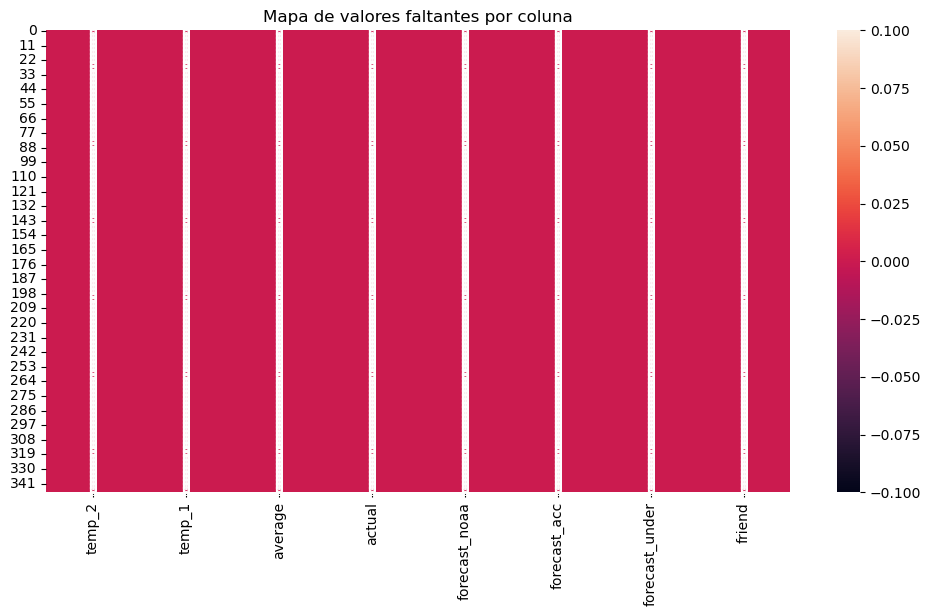

temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64


In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), annot=True)
plt.title("Mapa de valores faltantes por coluna")
plt.show()
print(df.isnull().sum())

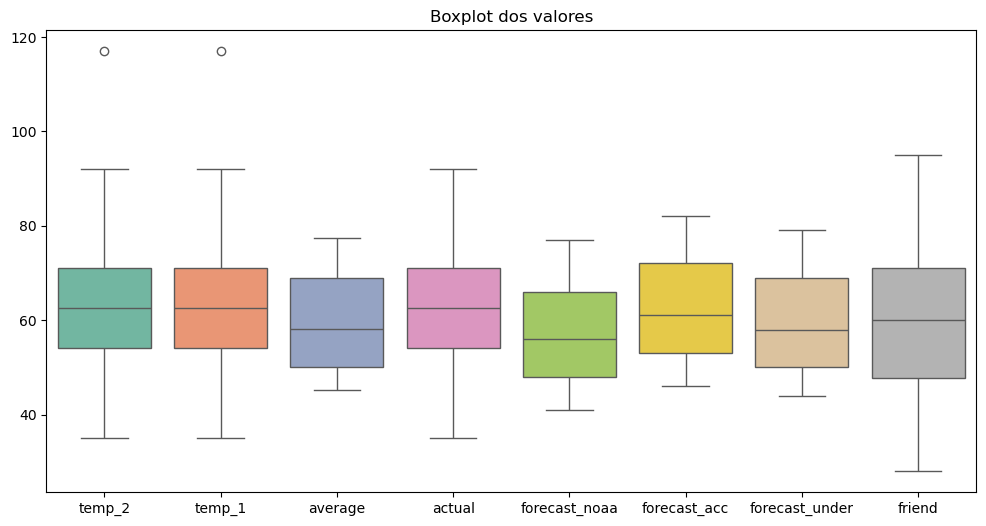

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,  palette="Set2")
plt.title("Boxplot dos valores")
plt.show()

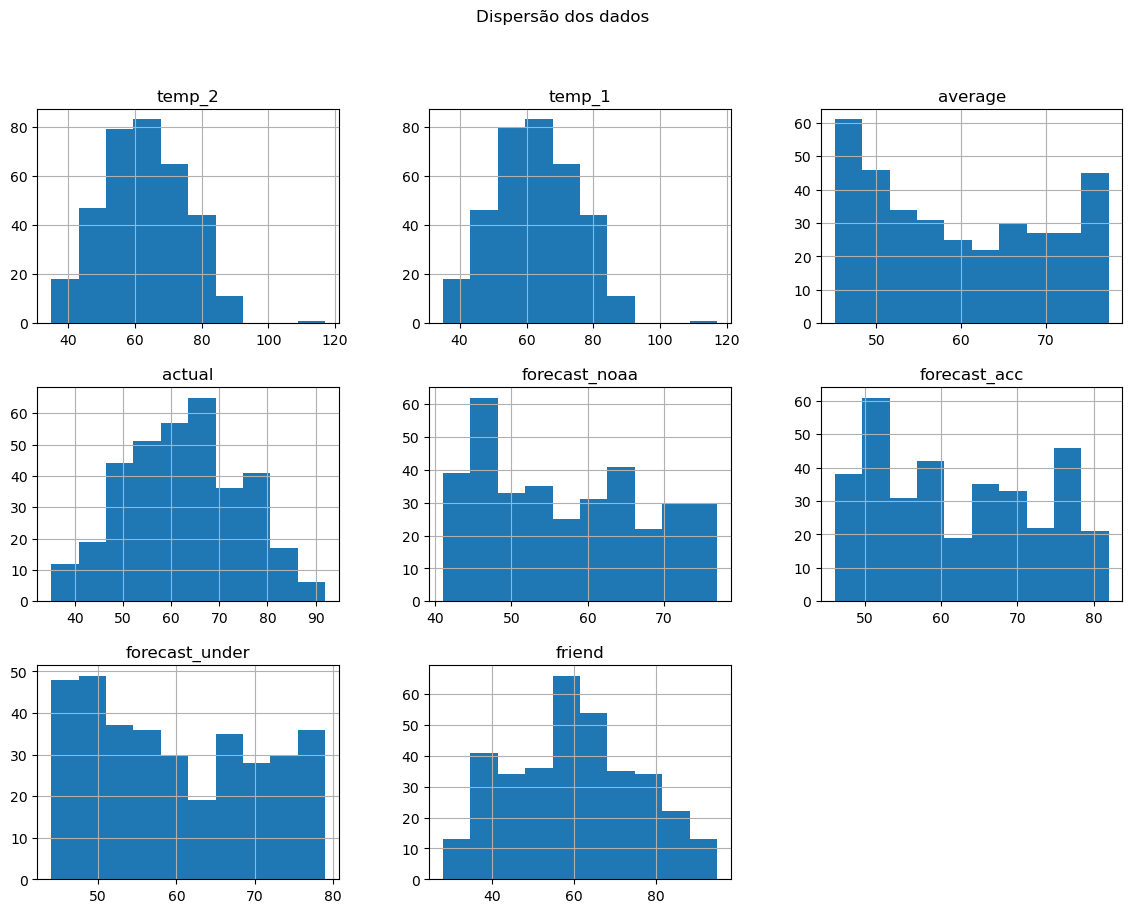

In [57]:
df.hist(figsize=(14, 10), grid=True)
plt.suptitle("Dispersão dos dados")
plt.show()

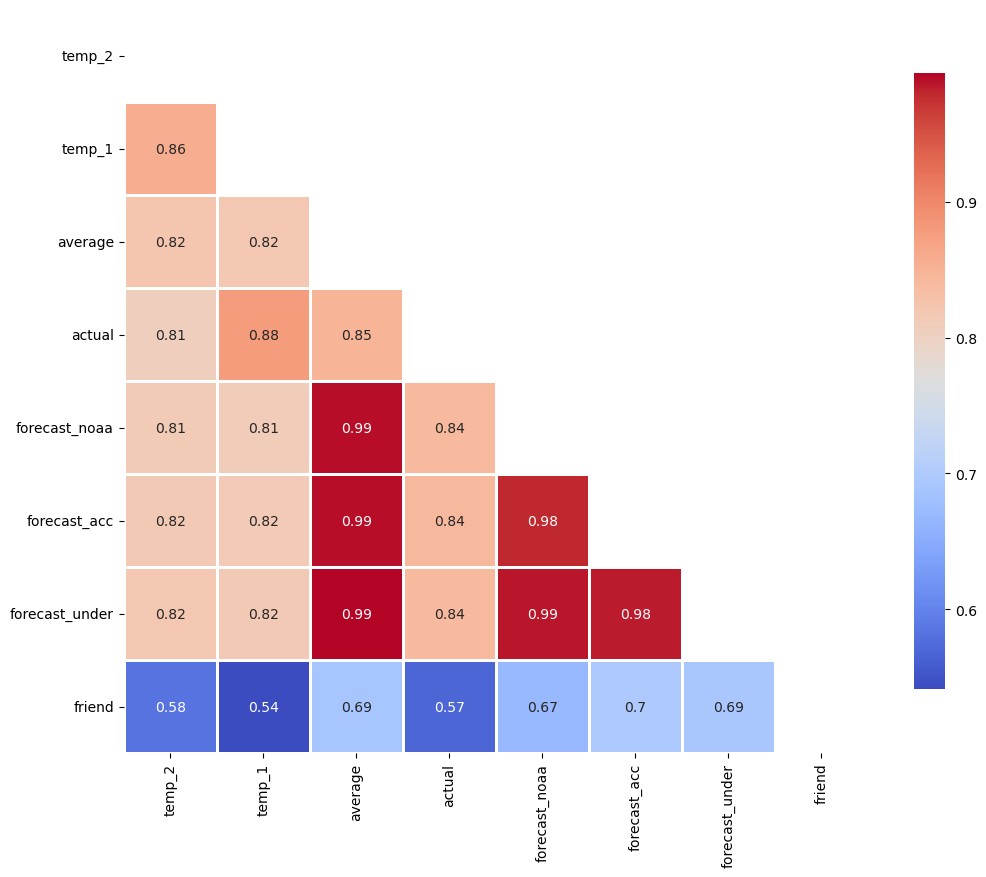

In [58]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, linewidths=1, linecolor='white', square=True,cbar_kws={"shrink": 0.8},  cmap="coolwarm")
plt.show()

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df.drop(columns=["actual"], axis=1)
y = df["actual"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
pd.DataFrame(X_train)

,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
245,68,69,69.7,65,74,71,88
101,60,59,58.1,57,63,58,66
208,85,88,77.3,75,79,77,70
132,82,65,64.7,63,69,64,58
17,54,50,47.5,44,48,49,58
...,...,...,...,...,...,...,...
188,74,71,75.1,71,77,76,95
71,54,49,53.6,49,58,52,70
106,77,89,59.0,59,63,59,61
270,66,60,60.2,56,64,60,78


In [62]:
pd.DataFrame(y_train)

,actual
245,71
101,59
208,76
132,57
17,54
...,...
188,74
71,51
106,81
270,60


## Normalização dos dados

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [63]:
from sklearn.preprocessing import StandardScaler

Converta as variáveis independentes com o StandardScaler

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [67]:
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train_scaled[:3]

array([[ 0.46024541,  0.49565297,  0.91456372,  0.70092213,  1.07792273,
         1.01645538,  1.72343516],
       [-0.22082647, -0.31541552, -0.17334022, -0.04160725,  0.04669442,
        -0.18105611,  0.35734395],
       [ 1.90752316,  2.0366831 ,  1.62732837,  1.62908385,  1.54666288,
         1.56915299,  0.60572417]])

In [71]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          261 non-null    float64
 1   temp_1          261 non-null    float64
 2   average         261 non-null    float64
 3   forecast_noaa   261 non-null    float64
 4   forecast_acc    261 non-null    float64
 5   forecast_under  261 non-null    float64
 6   friend          261 non-null    float64
dtypes: float64(7)
memory usage: 14.4 KB


In [74]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          87 non-null     float64
 1   temp_1          87 non-null     float64
 2   average         87 non-null     float64
 3   forecast_noaa   87 non-null     float64
 4   forecast_acc    87 non-null     float64
 5   forecast_under  87 non-null     float64
 6   friend          87 non-null     float64
dtypes: float64(7)
memory usage: 4.9 KB


## Árvores de Decisão

In [75]:
#importar a arvore de decisão
from sklearn import tree

In [77]:
model = tree.DecisionTreeRegressor()

In [78]:
model.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [79]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

### Executar o modelo treinado na base de treinamento

In [81]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def print_metrics(y_test, y_test_pred):
  print("MEAN: ", mean_absolute_error(y_test, y_test_pred))
  print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_pred))
  print("MSE: ", mean_squared_error(y_test, y_test_pred))
  print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print("R²: ", r2_score(y_test, y_test_pred))

In [84]:
#extrair as inferencias y_pred
#calcular o score

#treino
print("Train Score:", model.score(X_train_scaled, y_train))

#teste
print("Test Score:", model.score(X_test_scaled, y_test))

Train Score: 1.0
Test Score: 0.6068266369754476


In [85]:
# treino
print_metrics(y_train, y_train_pred)

MEAN:  0.0
MAPE:  0.0
MSE:  0.0
RMSE:  0.0
R²:  1.0


In [86]:
# teste
print_metrics(y_test, y_test_pred)

MEAN:  5.551724137931035
MAPE:  0.08598433759034915
MSE:  54.67816091954023
RMSE:  7.394468264827447
R²:  0.6068266369754476


### Avaliação de Regressores - Exibir os Resultados

In [89]:
print_metrics(y_test, y_test_pred)

MEAN:  5.551724137931035
MAPE:  0.08598433759034915
MSE:  54.67816091954023
RMSE:  7.394468264827447
R²:  0.6068266369754476


## Validação cruzada com o algoritmo Árvores de Decisão

In [92]:
from sklearn.model_selection import cross_validate

In [136]:
reg_cv_scores = cross_validate(model, X_train_scaled, y_train, cv=5, scoring='r2')

In [137]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (reg_cv_scores['test_score'].mean(), reg_cv_scores['test_score'].std()))

0.63 accuracy with a standard deviation of 0.09


### Exiba a árvore de decisão do modelo treinado

In [138]:
from sklearn import tree

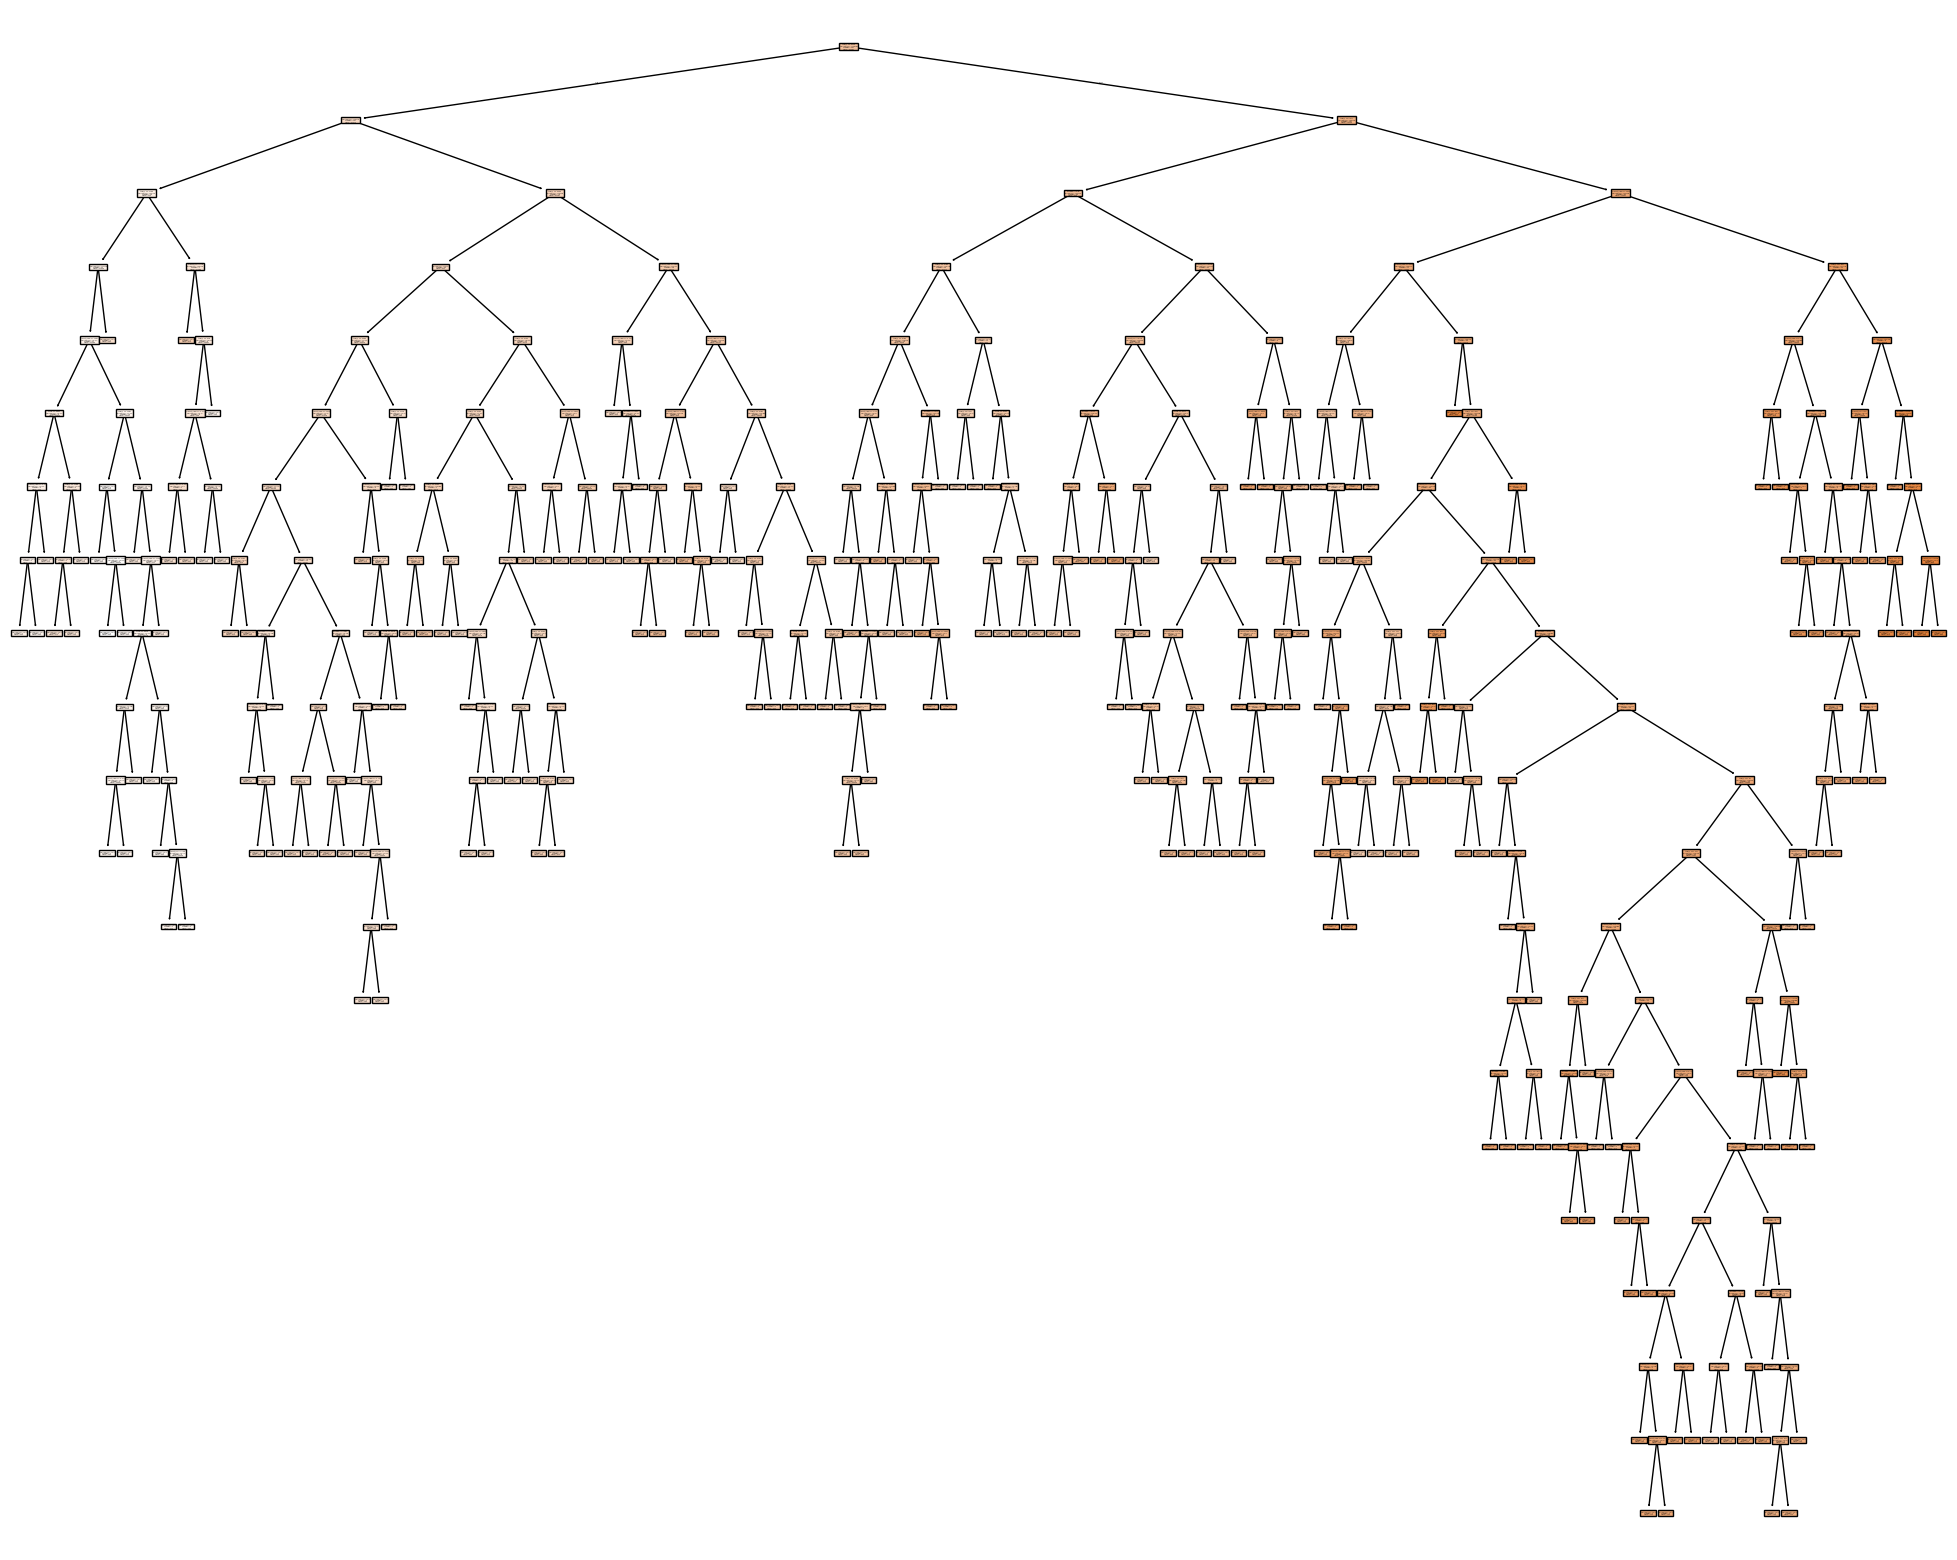

In [139]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=y_test.unique(),
                   filled=True)

### Avaliar o melhor valor de max_depth

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

score = []

params = {'max_depth': range(1, 21)}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train_scaled, y_train)

best_max_depth = grid_search.best_params_['max_depth']

print(f"Melhor parâmetro encontrado: {grid_search.best_params_}")
print(f"Melhor score R² (na validação cruzada): {grid_search.best_score_:.4f}")

# for i in range(1,21):
#   regressor = DecisionTreeRegressor(max_depth=i)

#   regressor.fit(X_train_scaled, y_train)

#   y_pred = regressor.predict(X_test_scaled)

#   score.append(r2_score(y_test, y_pred))


# plt.figure(figsize=(10,6))
# plt.plot(range(1,21), score, color='blue', linestyle='dashed', marker='o',
#            markerfacecolor = 'red', markersize=10)
# plt.title('Score Rate vs Max Depth Value')
# plt.xlabel('Max Depth')
# plt.ylabel('Score Rate')
# plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhor parâmetro encontrado: {'max_depth': 3}
Melhor score R² (na validação cruzada): 0.7769


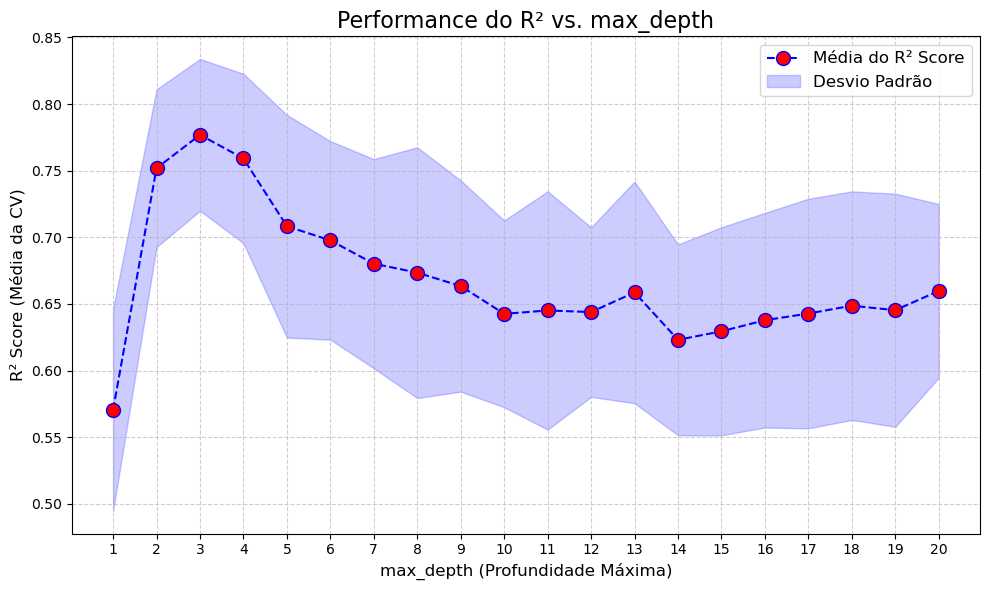

In [212]:
cv_results = grid_search.cv_results_

depths = np.asarray(cv_results['param_max_depth'], dtype=float)
mean_r2_scores = np.asarray(cv_results['mean_test_score'], dtype=float)
std_r2_scores = np.asarray(cv_results['std_test_score'], dtype=float)

plt.figure(figsize=(10,6))
plt.plot(depths, mean_r2_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor = 'red', markersize=10, label='Média do R² Score')

plt.fill_between(depths, mean_r2_scores - std_r2_scores, mean_r2_scores + std_r2_scores, color='blue', alpha=0.2, label='Desvio Padrão')

plt.title('Performance do R² vs. max_depth', fontsize=16)
plt.xlabel('max_depth (Profundidade Máxima)', fontsize=12)
plt.ylabel('R² Score (Média da CV)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, 21))
plt.tight_layout()

plt.show()

In [186]:
best_model = grid_search.best_estimator_
print(best_model)

DecisionTreeRegressor(max_depth=3)


In [213]:
final_score = best_model.score(X_test_scaled, y_test)
print(f"R² Score final no dataset de teste: {final_score:.4f}")

R² Score final no dataset de teste: 0.7685


Ao utilizar R2 score como métrica de avaliação, o melhor valor para max_depth é **4**

### Criar um regressor com o melhor valor para max_depth e avalie





In [210]:
reg_best = DecisionTreeRegressor(max_depth=best_max_depth)

reg_best.fit(X_train_scaled, y_train)

print('Train: ', reg_best.score(X_train_scaled, y_train))
print('Test: ',reg_best.score(X_test_scaled, y_test))

Train:  0.8394243415756086
Test:  0.7685442699037649


In [203]:
print_metrics(y_test, reg_best.predict(X_test_scaled))

MEAN:  4.298171655733802
MAPE:  0.06757892776598018
MSE:  31.615646132169775
RMSE:  5.622779217804108
R²:  0.7726618872154287


O R² score tem valor 0.76, o que é o maior possível para diferentes valores de max_depth anteriormente testados.

Vale ressaltar que, para essa métrica, quanto maior (mais perto de 1), melhor.

Outro detalhe importante é que, para o treinamento e a predição do modelo regressor de árvore de decisão, não faz diferença usar os valores dos inputs (X) de treino e de teste padronizados ou originais, uma vez que isso não impacta o algoritmo de árvore de decisão.

Por fim, foi preferível utilizar a validação cruzada para escolher o melhor valor de max_depth em vez de confiar em uma abordagem que cria interativamente regressores que utilizam o conjunto de teste para comparar o valor predito com o real. Desse modo, ao utilizar a validação cruzada, o modelo terá menos viés ao fazer a predição do conjunto de teste que nunca fora visto anteriormente.

### Plot dos valores previstos vs reais

In [216]:
y_pred = reg_best.predict(X_test_scaled)

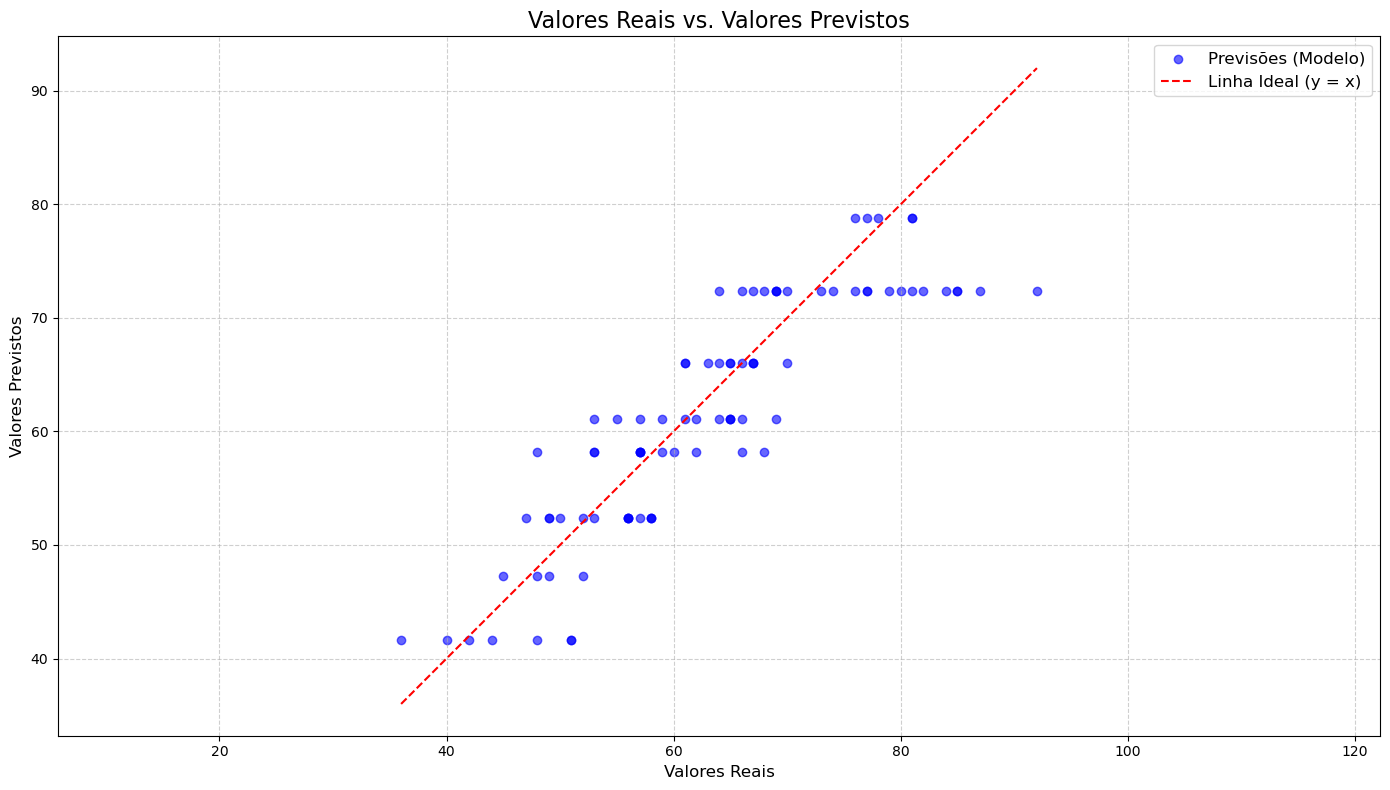

In [229]:
fig = plt.figure(figsize=(14,8))

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Previsões (Modelo)')

min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
limits = [min_val, max_val]

plt.plot(limits, limits, 'r--', label='Linha Ideal (y = x)')

plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Valores Previstos', fontsize=12)

plt.title('Valores Reais vs. Valores Previstos', fontsize=16)
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

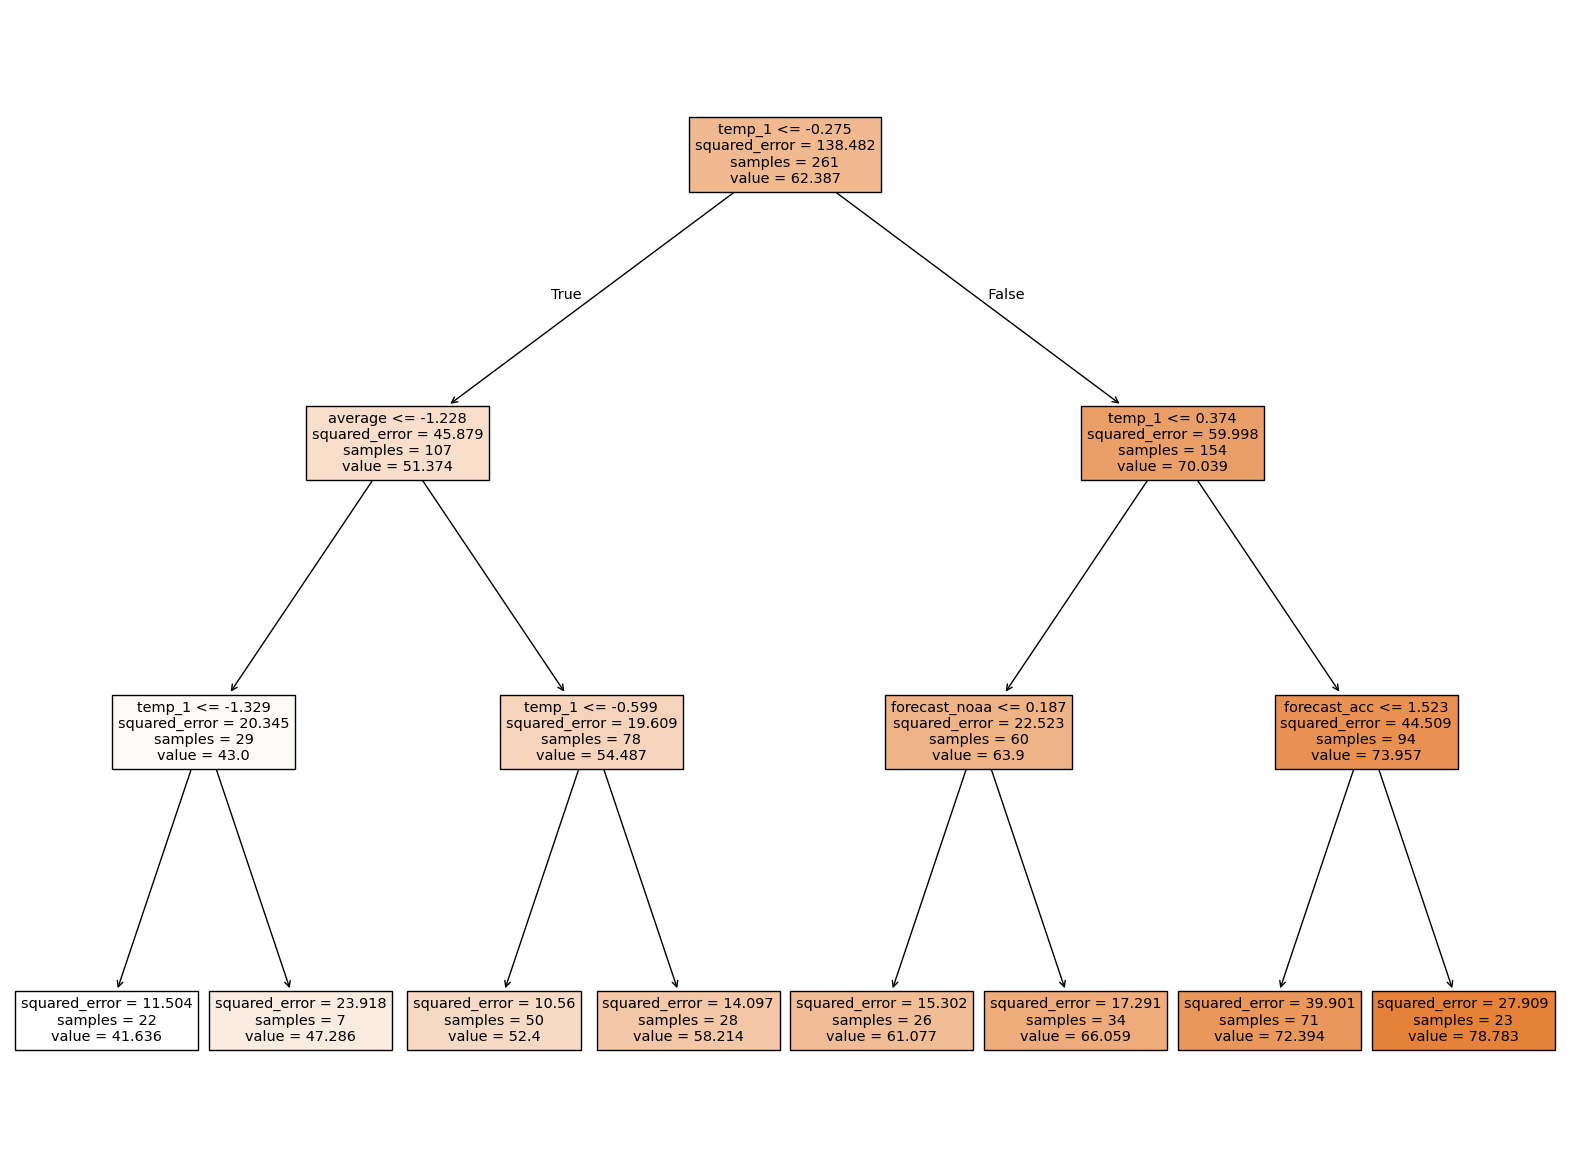

In [232]:
fig = plt.figure(figsize=(20,15))
plt.title('Melhor regressor')
_ = tree.plot_tree(reg_best,
                   feature_names=df.columns,
                   class_names=y_test.unique(),
                   filled=True)

## Conclusão